In [1]:
# This Source Code Form is subject to the terms of the Mozilla Public
# License, v. 2.0. If a copy of the MPL was not distributed with this
# file, You can obtain one at https://mozilla.org/MPL/2.0/.

# Mapas Urbano Gran Santiago

**Autor**: Diego Caro ([@diegocaro](https://twitter.com/diegocaro)).

El objetivo de este notebook es contarles como procesar la información geográfica del Censo 2017. En particular, trabajaremos en extraer las áreas urbanas de las comunas del Gran Santiago. Puedes encontrar otras regiones en el sitio web del [Censo 2017](http://www.censo2017.cl/servicio-de-mapas/).

**Descargo de responsabilidad**: este notebook no constituye información cartográfica oficial de la República de Chile. Su único fin es educativo, y no debe ser utilizada como referencia para decisiones oficiales sobre la pandemia.

**Reconocimiento**: este notebook está inspirado por el gran trabajo de mi amigo [@carnby](https://github.com/carnby/mapas_censo_2017).

## Preámbulo: descargando datos y módulos de Python

La cartografía de la Región Metropolitana está disponible en el archivo [r13.rar](https://www.ine.cl/docs/default-source/descarga-cartograf%C3%ADa-censo-2017/r13.rar). Debes descomprimir el archivo dentro del directorio `./input/`.

Chequea que efectivamente estén los shapefiles del censo en el directorio input. Deberías ver algo así:

In [2]:
from glob import glob
'El directorio ./input/R13/ debería tener {} archivos.'.format(len(glob('./input/R13/*')))

'El directorio ./input/R13/ debería tener 82 archivos.'

In [3]:
# si esta celda hace error, es que no haz descargado o descomprimido los shapefiles!
assert(len(glob('./input/R13/*'))==82)

En esta celda configuramos el notebook para que muestre las figuras en alta resolución (y cargamos los mejores módulos de Python  ❤️).

In [4]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(palette='viridis', context='notebook', font_scale=1.0, font='Avenir Next Condensed')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Cargando los datos geográficos

In [5]:
comunas = gpd.read_file('input/R13/COMUNA_C17.shp')
comunas.head()

REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
0     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
1     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13402   
2     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13124   
3     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13103   
4     13  REGIÓN METROPOLITANA DE SANTIAGO       133  CHACABUCO  13301   

    NOM_COMUNA  SHAPE_Leng  SHAPE_Area  \
0        PAINE    1.625330    0.066035   
1         BUIN    0.884164    0.021166   
2     PUDAHUEL    0.720176    0.019124   
3  CERRO NAVIA    0.170180    0.001076   
4       COLINA    1.692007    0.093820   

                                            geometry  
0  POLYGON ((-70.61889 -33.73808, -70.61811 -33.7...  
1  POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...  
2  POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...  
3  POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...  
4  POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...

GeoPandas permite colorear un shapefile según los valores de una columna. Por ejemplo, podemos colorear según la Provincia a la que pertenece cada comuna.

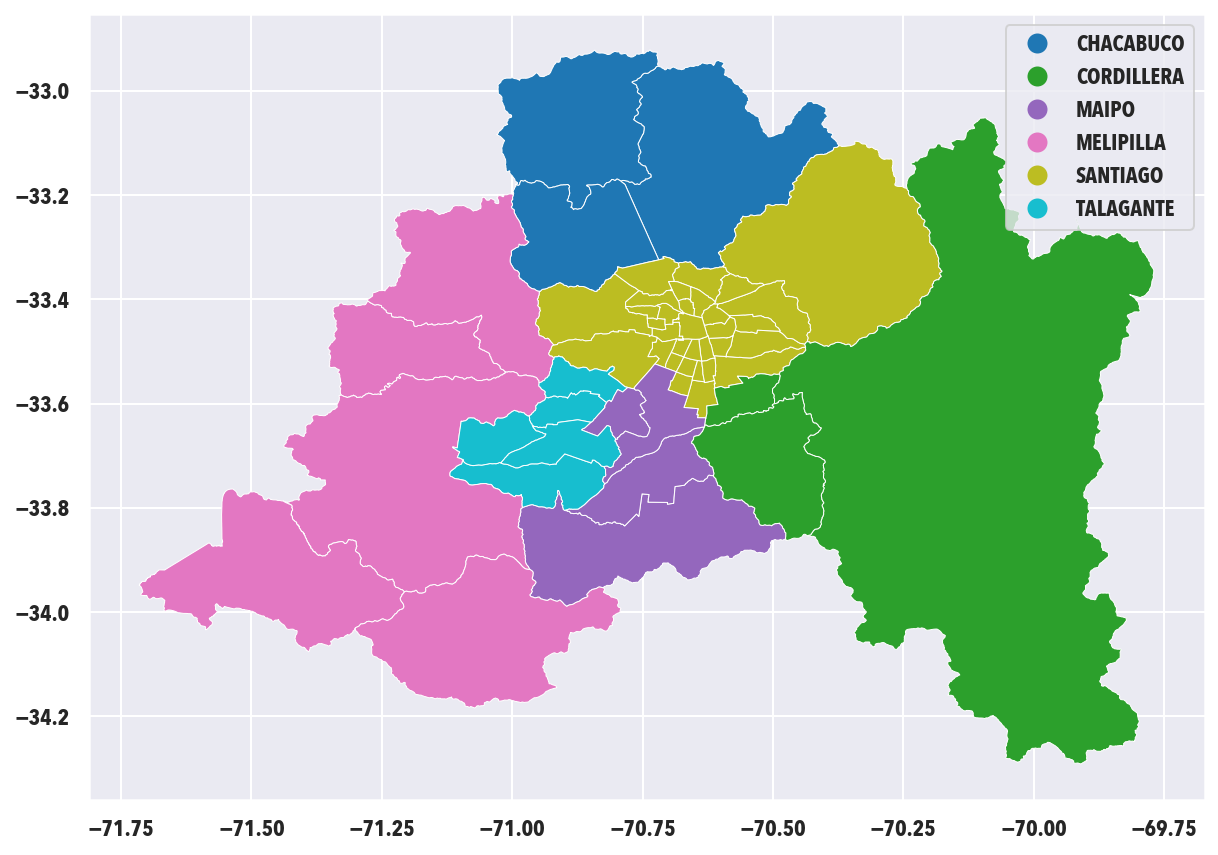

In [6]:
comunas.plot(figsize=(10,10), linewidth=0.5, column='NOM_PROVIN', legend=True)

Ahora cargaremos los distritos y las zonas urbanas, siguiendo la especificación del documento [Alcances y Consideraciones para el usuario del Censo](http://www.censo2017.cl/servicio-de-mapas/descargas/mapas/alcances-base-cartografica-censo2017.pdf) (p.3)

 > \[...\] Para  efectos legales, es  la Comuna  la  unidad  básica de  administración  del  territorio...  
 > \[...\] El territorio comunal se divide en distritos, los que pueden ser urbanos, rurales o mixtos...  
 > \[...\] En el área urbana se reconocen Zonas censales y en el área rural, Localidades...  
 > \[...\] Las Zonas censales se componen de manzanas y las Localidades de entidades...  

In [7]:
distritos = gpd.read_file('input/R13/DISTRITO_C17.shp')
distritos.head()

REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
0     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
1     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
2     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
3     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
4     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   

  NOM_COMUNA  COD_DISTRI TIPO_DISTR  SHAPE_Leng  SHAPE_Area  \
0      PAINE           7      RURAL    0.306170    0.004895   
1      PAINE           6      MIXTO    0.283347    0.003383   
2      PAINE           9      MIXTO    0.637308    0.013032   
3      PAINE           5      RURAL    0.539426    0.010221   
4      PAINE           8      MIXTO    0.443465    0.006985   

                                            geometry  
0  POLYGON ((-70.61889 -33.73808, -70.61811 -33.7...  
1  POLYGON ((-70.69162 -33.80459, -70.69164 -33.8...  
2  POLYGON ((-70.86894 -33.81140, -70.86883 -33.8...  
3  POLYGON ((-70.57773 -33.82456, -70.57751 -33.8...  
4  POLYGON ((-70.80237 -33.82702, -70.80234 -33.8...

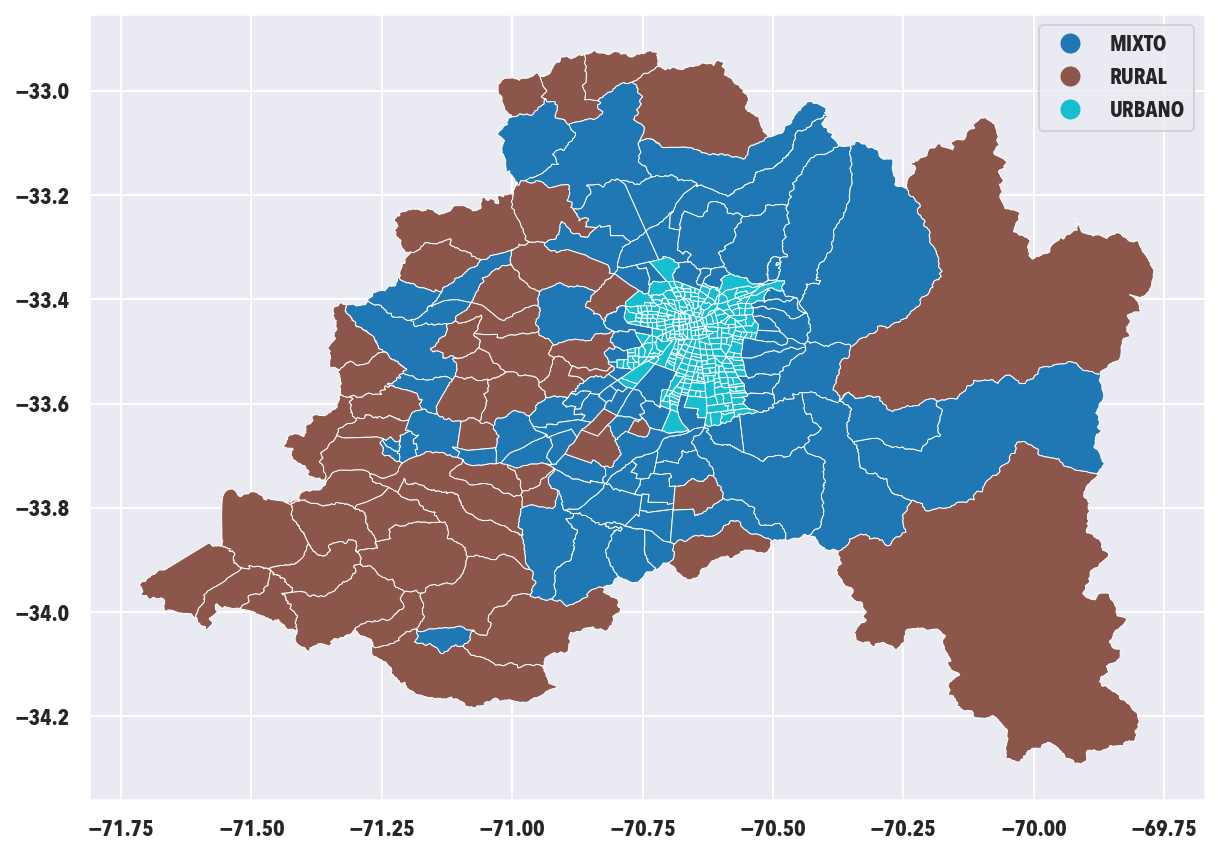

In [8]:
distritos.plot(figsize=(10,10), linewidth=0.5, column='TIPO_DISTR', legend=True)

In [9]:
zonas = gpd.read_file('input/R13/ZONA_C17.shp')
zonas.head()

REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
0     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
1     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
2     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
3     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
4     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   

  NOM_COMUNA URBANO  DISTRITO  LOC_ZON    GEOCODIGO  SHAPE_Leng  SHAPE_Area  \
0      PAINE  PAINE         1        3  13404011003    0.030604    0.000043   
1      PAINE  PAINE         1        2  13404011002    0.045283    0.000071   
2      PAINE  PAINE         6        4  13404061004    0.084715    0.000102   
3      PAINE  PAINE         6        1  13404061001    0.052736    0.000112   
4      PAINE  PAINE         6        2  13404061002    0.024273    0.000035   

                                            geometry  
0  POLYGON ((-70.72732 -33.80301, -70.72713 -33.8...  
1  POLYGON ((-70.70792 -33.80101, -70.70783 -33.8...  
2  POLYGON ((-70.70724 -33.80454, -70.70712 -33.8...  
3  POLYGON ((-70.74243 -33.81015, -70.74262 -33.8...  
4  POLYGON ((-70.73996 -33.80852, -70.73929 -33.8...

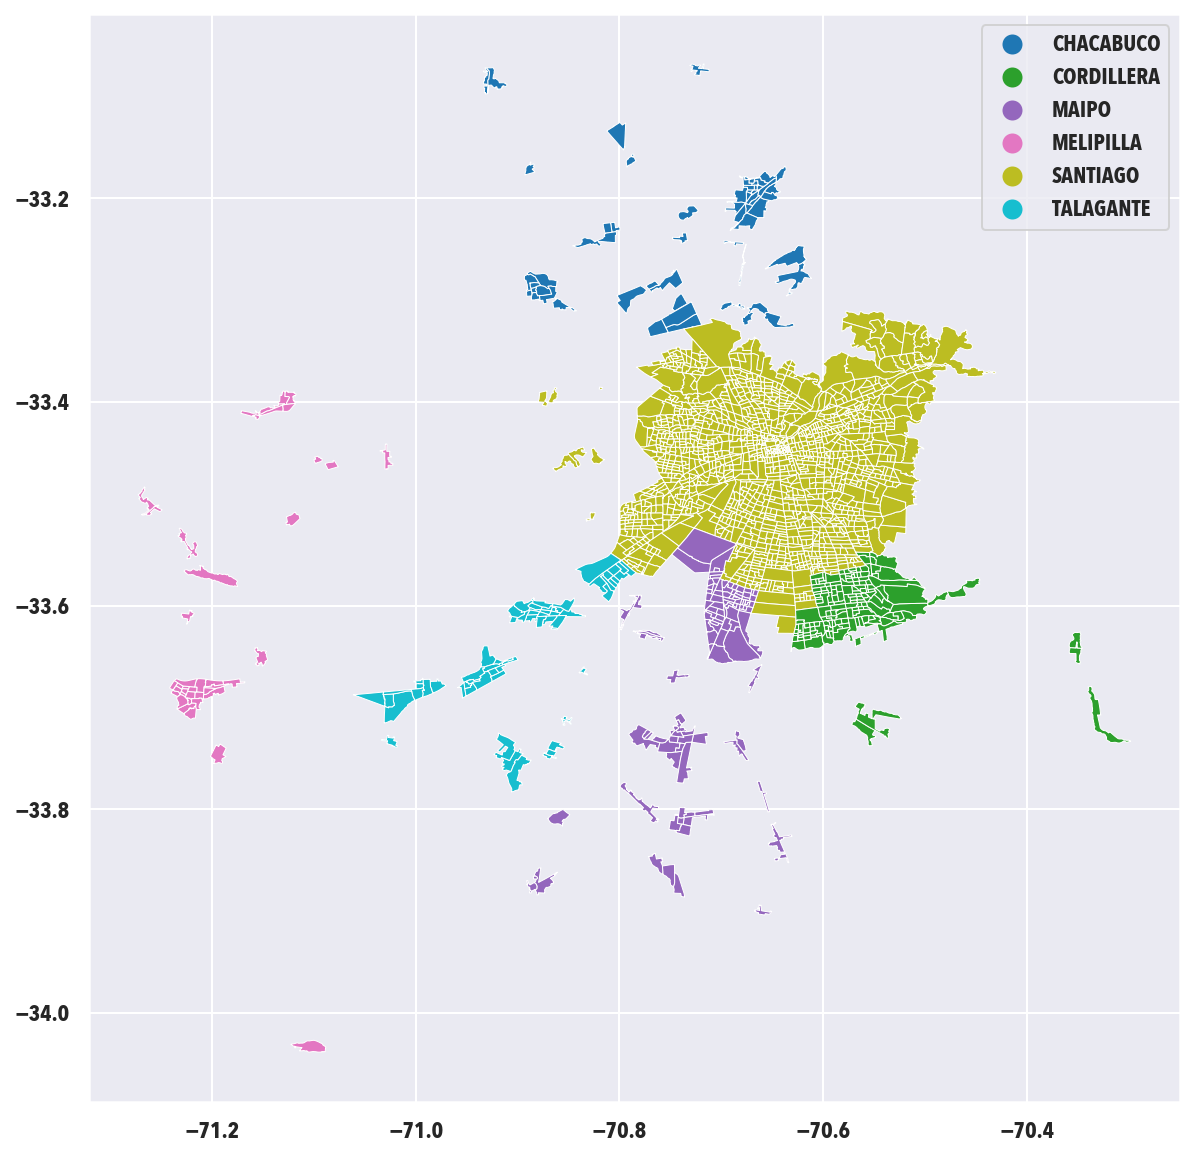

In [10]:
zonas.plot(figsize=(10,10), linewidth=0.5, column='NOM_PROVIN', legend=True)

## Filtrando datos

Ahora nos concentraremos en el área **urbana** del Gran Santiago. Recuerda que las Zonas correspondes al área urbana.

El Gran Santiago está compuesto por 40 comunas en 5 provincias:
- 32 comunas de la Provincia de Santiago
- Colina y Lampa de la Provincia de Chacabuco
- Puente Alto, Pirque, y San José de Maipo de la Provincia Cordillera
- San Bernardo de la Provincia de Maipo
- Padre Hurtado y Peñaflor de la Provincia de Talagante

Fuente: https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Ubicaci%C3%B3n_de_las_Comunas_del_Gran_Santiago.

Primer, veamos si la cartografía de las zonas urbanas incluyen todas las comunas de la RM:

In [11]:
zonas.drop_duplicates('NOM_COMUNA')[['NOM_PROVIN','NOM_COMUNA']].sort_values('NOM_PROVIN')

NOM_PROVIN           NOM_COMUNA
40     CHACABUCO               COLINA
76     CHACABUCO               TILTIL
81     CHACABUCO                LAMPA
1552  CORDILLERA               PIRQUE
1547  CORDILLERA    SAN JOSÉ DE MAIPO
1239  CORDILLERA          PUENTE ALTO
0          MAIPO                PAINE
16         MAIPO                 BUIN
1533       MAIPO      CALERA DE TANGO
1470       MAIPO         SAN BERNARDO
1088   MELIPILLA            MELIPILLA
1863   MELIPILLA                ALHUÉ
102    MELIPILLA             CURACAVÍ
101    MELIPILLA          MARÍA PINTO
125     SANTIAGO           LA FLORIDA
1114    SANTIAGO                MACUL
116     SANTIAGO  PEDRO AGUIRRE CERDA
1381    SANTIAGO                RENCA
1425    SANTIAGO            QUILICURA
115     SANTIAGO           LA PINTANA
279     SANTIAGO            PEÑALOLÉN
37      SANTIAGO             PUDAHUEL
1556    SANTIAGO          SAN JOAQUÍN
1584    SANTIAGO           SAN MIGUEL
1608    SANTIAGO            LA GRANJA
1638    SANTIAGO            SAN RAMÓN
1710    SANTIAGO             SANTIAGO
938     SANTIAGO                MAIPÚ
909     SANTIAGO        QUINTA NORMAL
1067    SANTIAGO            CERRILLOS
836     SANTIAGO             VITACURA
335     SANTIAGO          PROVIDENCIA
336     SANTIAGO             RECOLETA
381     SANTIAGO                ÑUÑOA
382     SANTIAGO           HUECHURABA
403     SANTIAGO           LAS CONDES
404     SANTIAGO         LO BARNECHEA
437     SANTIAGO     ESTACIÓN CENTRAL
878     SANTIAGO             LO PRADO
480     SANTIAGO          LA CISTERNA
541     SANTIAGO            LO ESPEJO
567     SANTIAGO          CERRO NAVIA
603     SANTIAGO             CONCHALÍ
727     SANTIAGO             LA REINA
503     SANTIAGO            EL BOSQUE
642     SANTIAGO        INDEPENDENCIA
1227   TALAGANTE        PADRE HURTADO
1207   TALAGANTE             PEÑAFLOR
1852   TALAGANTE             EL MONTE
117    TALAGANTE        ISLA DE MAIPO
1839   TALAGANTE            TALAGANTE

Ahora filtraremos las comunas que pertecen al Gran Santiago.

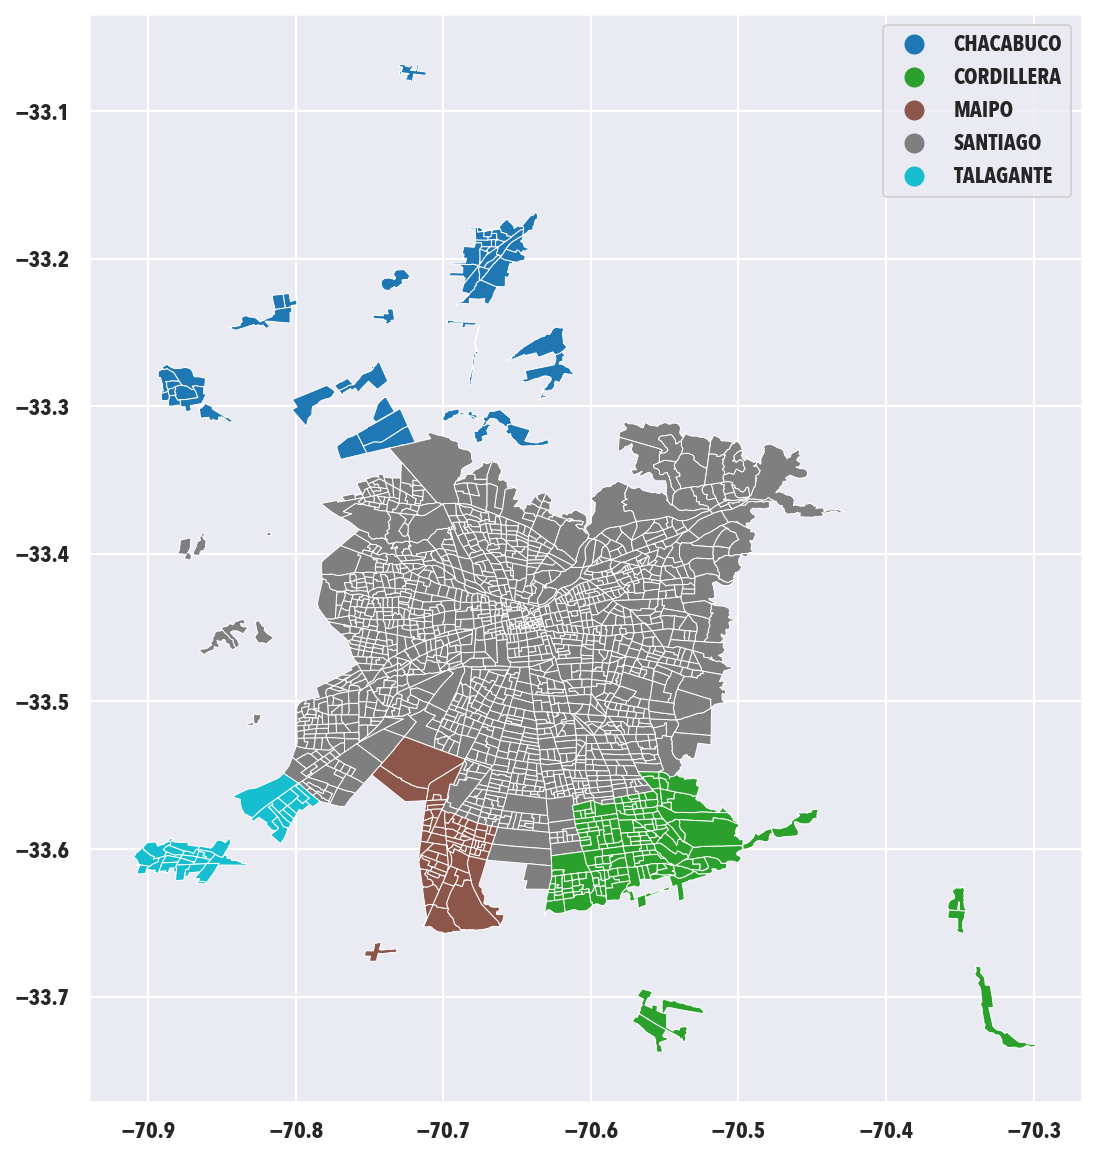

In [12]:
zonas_stgo = zonas[zonas.NOM_PROVIN.isin(['SANTIAGO','CORDILLERA'])
                  |(zonas.NOM_COMUNA.isin(['COLINA','LAMPA','SAN BERNARDO','PADRE HURTADO','PEÑAFLOR']))]
zonas_stgo.plot(figsize=(10,10), linewidth=0.5, column='NOM_PROVIN', legend=True)

Perfecto! Pero... ¿cómo podemos calcular el área urbana de una comuna?. Exacto, uniendo los distritos urbanos :D

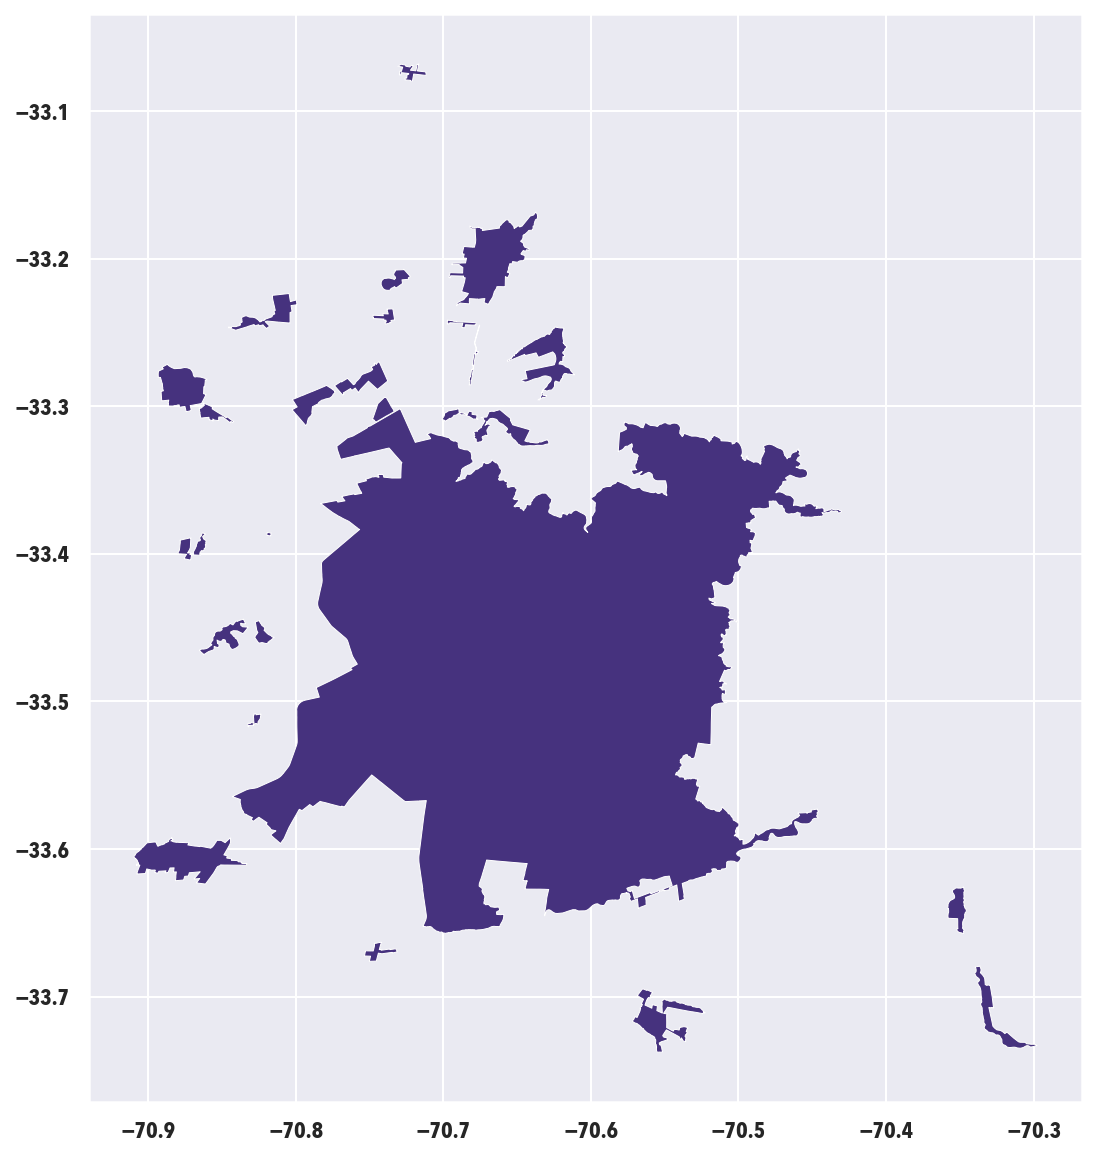

In [13]:
# union de todas las áreas urbanas del Gran Santiago
EPSILON=0.00000001 # pequeño truquillo para simplificar la geometría

urban_stgo = zonas_stgo.dissolve(by='REGION').buffer(-EPSILON).geometry
assert urban_stgo.shape[0] == 1
urban_stgo.plot(figsize=(10,10),linewidth=0.5,)

Para simplificar el análisis, nos quedaremos con el área contigua urbana de mayor superficie. Ojo, esto es solo para **simplificar** la visualización. Si quieres mantener el nivel de detalle, simplemente elimina la siguiente celda.

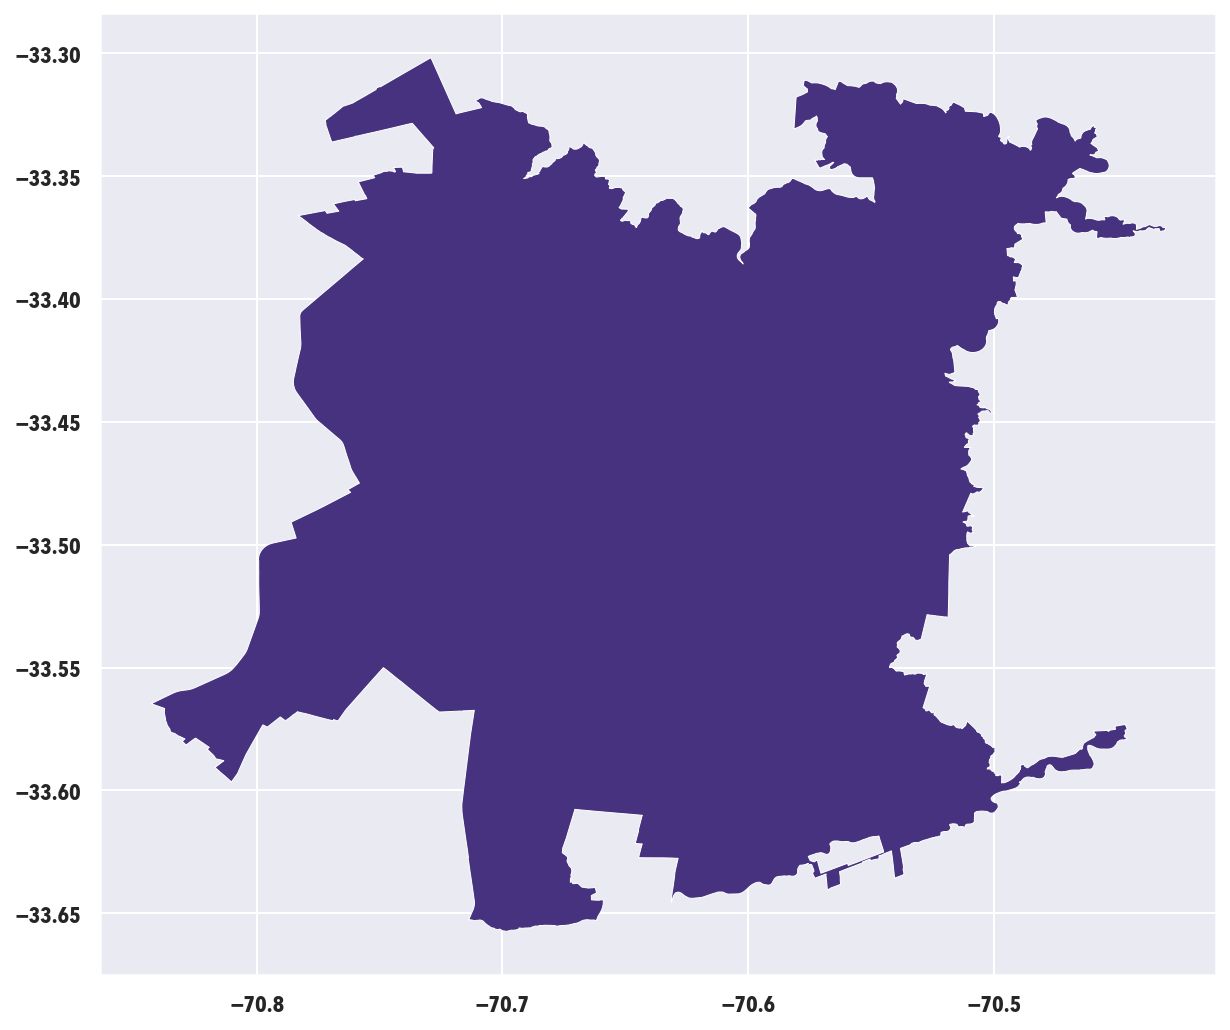

In [14]:
urban_stgo = gpd.GeoSeries(max(urban_stgo.iloc[0], key=lambda a: a.area))
urban_stgo.plot(figsize=(10,10),linewidth=0.5,)

Y ahora calculamos la intersección del área urbana de la RM, con las comunas del Gran Santiago.

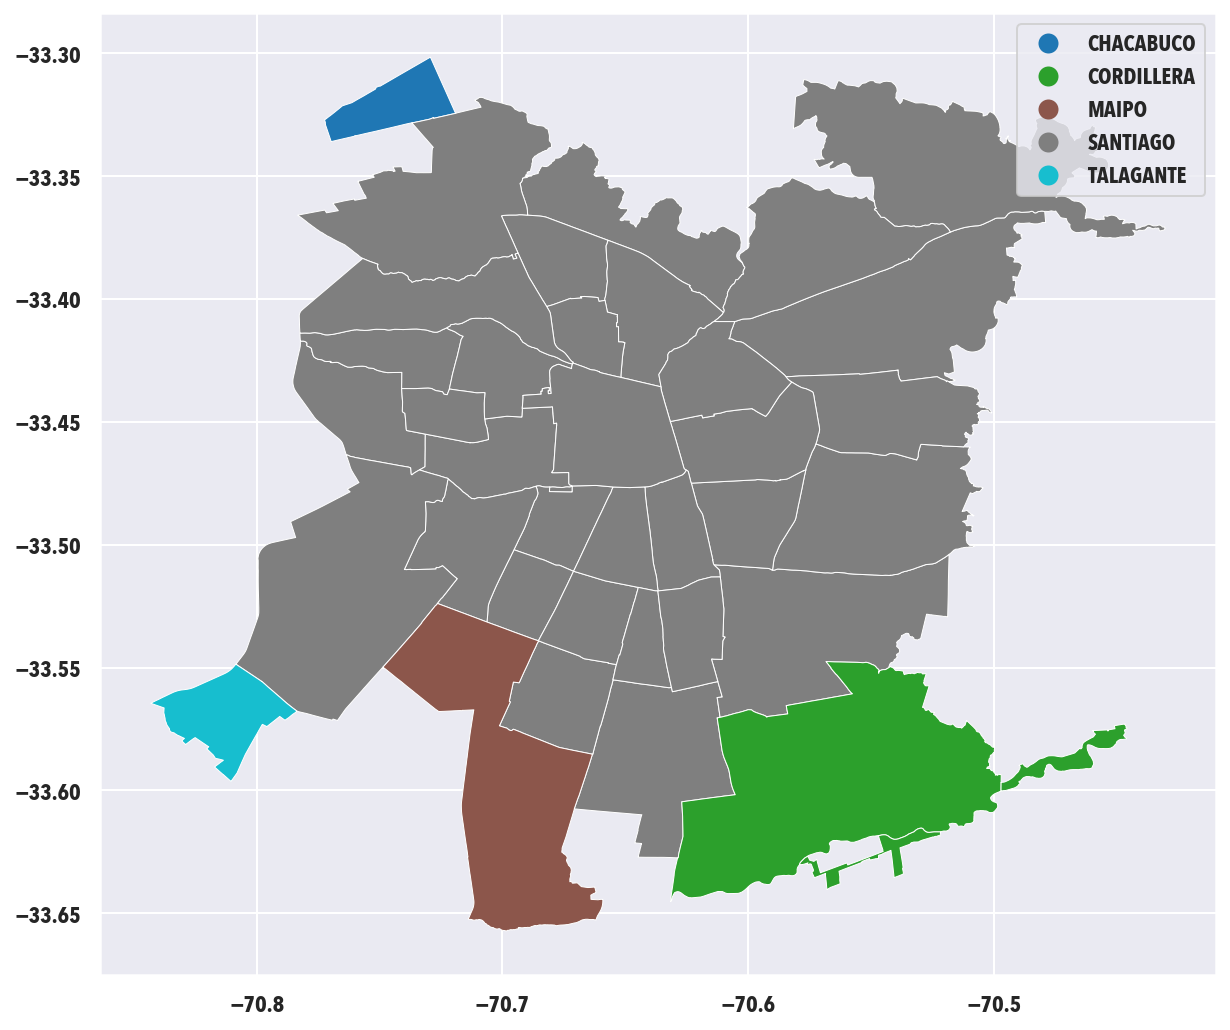

In [15]:
urban_comunas = comunas.assign(geometry = lambda x: x.geometry.map(lambda dc: dc.intersection(urban_stgo.iloc[0])))
urban_comunas = urban_comunas[~urban_comunas.is_empty]
urban_comunas.plot(figsize=(10,10),linewidth=0.5,column='NOM_PROVIN', legend=True)

Y ahora con los distritos :)

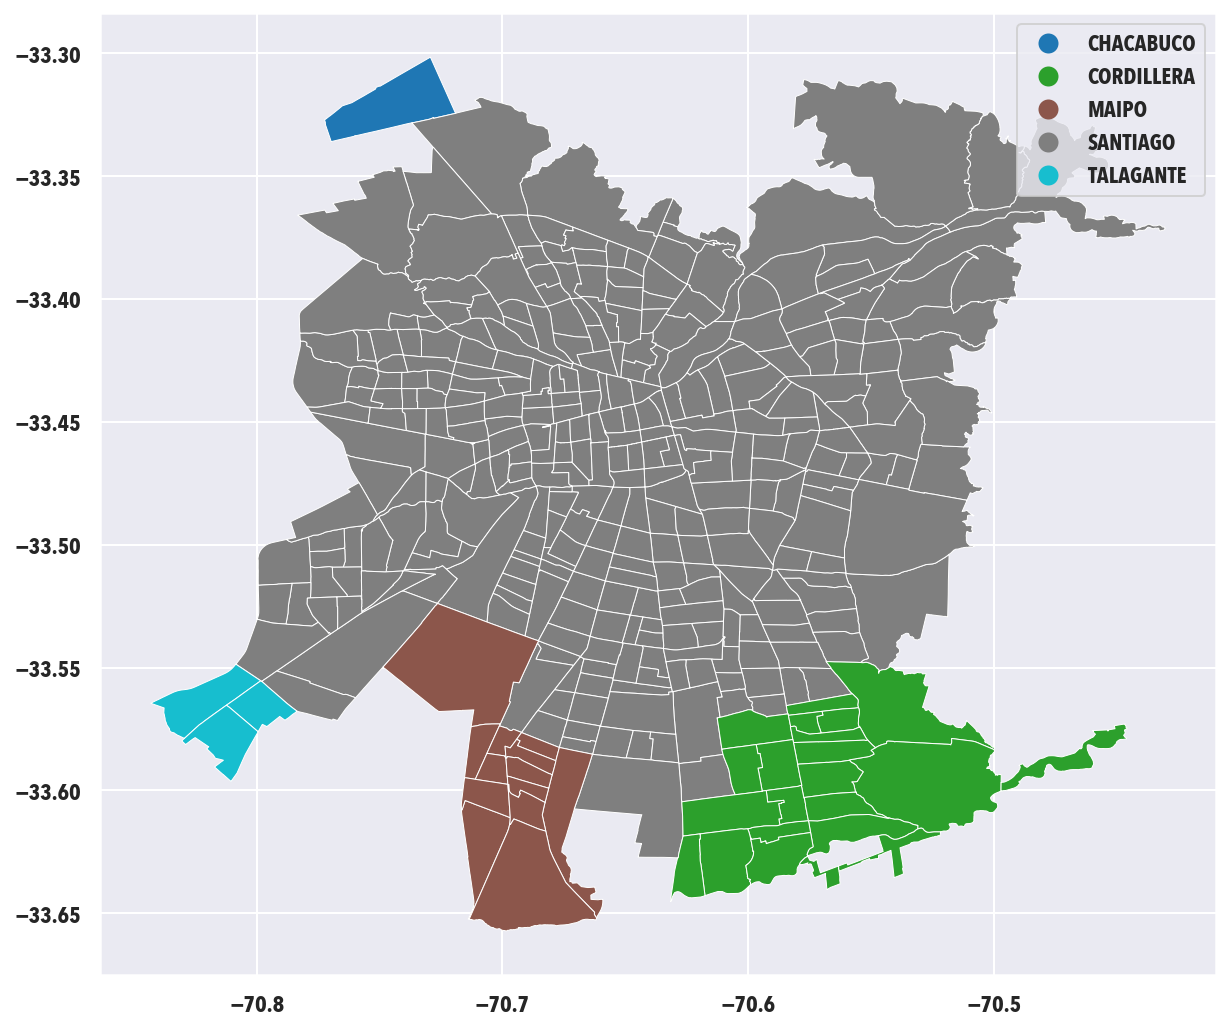

In [16]:
urban_distritos = distritos.assign(geometry = lambda x: x.geometry.map(lambda dc: dc.intersection(urban_stgo.iloc[0])))
urban_distritos = urban_distritos[~urban_distritos.is_empty]
urban_distritos.plot(figsize=(10,10),linewidth=0.5,column='NOM_PROVIN', legend=True)

Y ahora con las zonas.

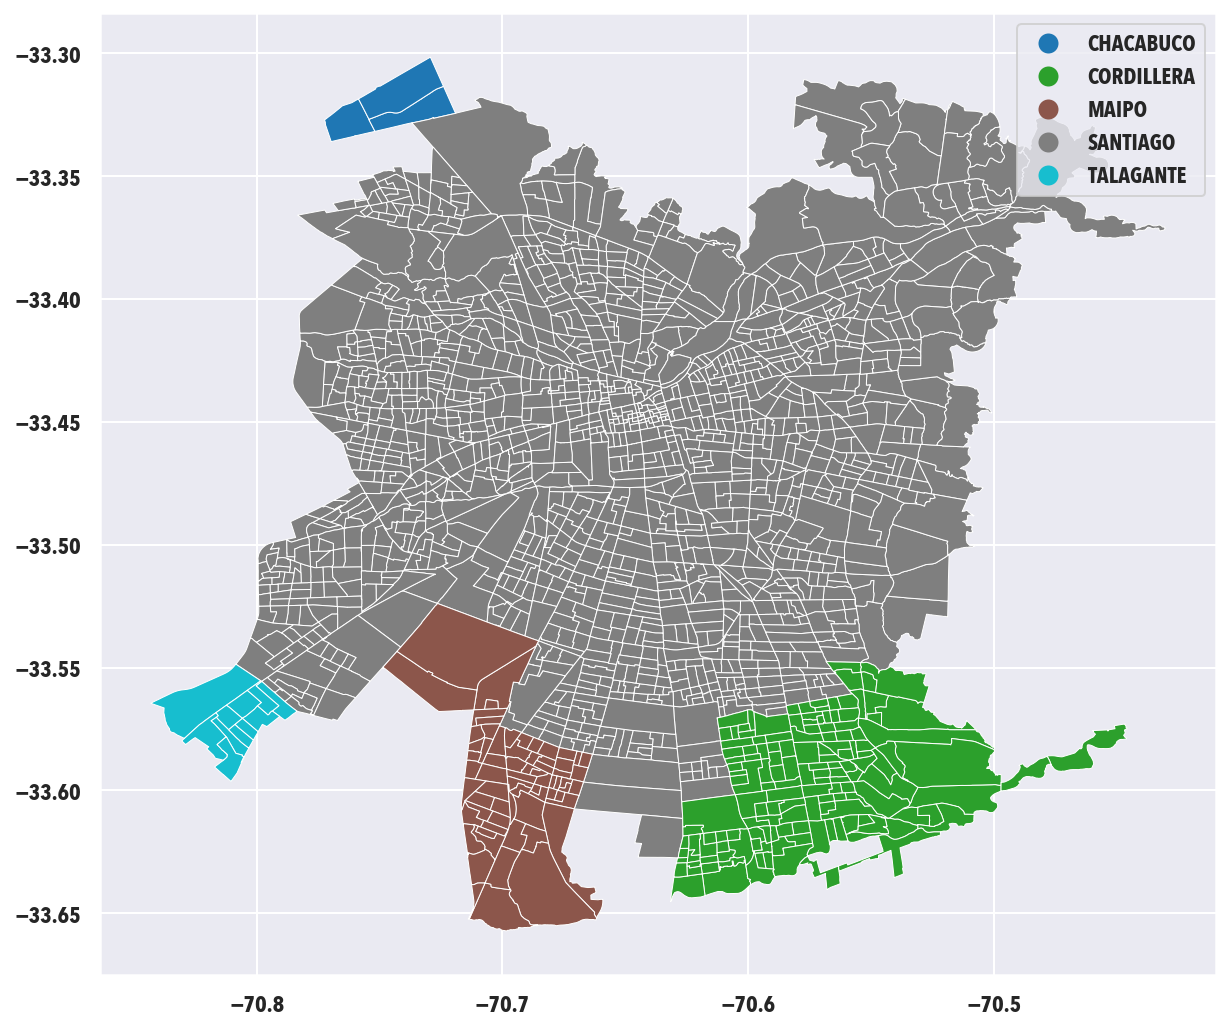

In [17]:
urban_zonas = zonas.assign(geometry = lambda x: x.geometry.map(lambda dc: dc.intersection(urban_stgo.iloc[0])))
urban_zonas = urban_zonas[~urban_zonas.is_empty]
urban_zonas.plot(figsize=(10,10),linewidth=0.5,column='NOM_PROVIN', legend=True)

## Final: visualizando y guardando datos

Ya tenemos el área urbana del Gran Santiago, ahora aprovecharemos de indicar el nombre de cada comuna en la visualización del mapa.

In [18]:
# este es un truquillo para agregar borde al texto
# más detalles en https://matplotlib.org/3.2.1/tutorials/advanced/patheffects_guide.html
import matplotlib.patheffects as path_effects

In [19]:
# esta biblioteca ajusta el texto para que no se sobrelape
try:
    from adjustText import adjust_text
except:
    adjust_text = lambda *x,**y: x

In [20]:
# configuracion para el estilo del texto
text_style = dict(horizontalalignment='center', fontsize=14, fontweight='bold'
                 ,color='white', fontstretch='condensed')
text_effects = [path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()]

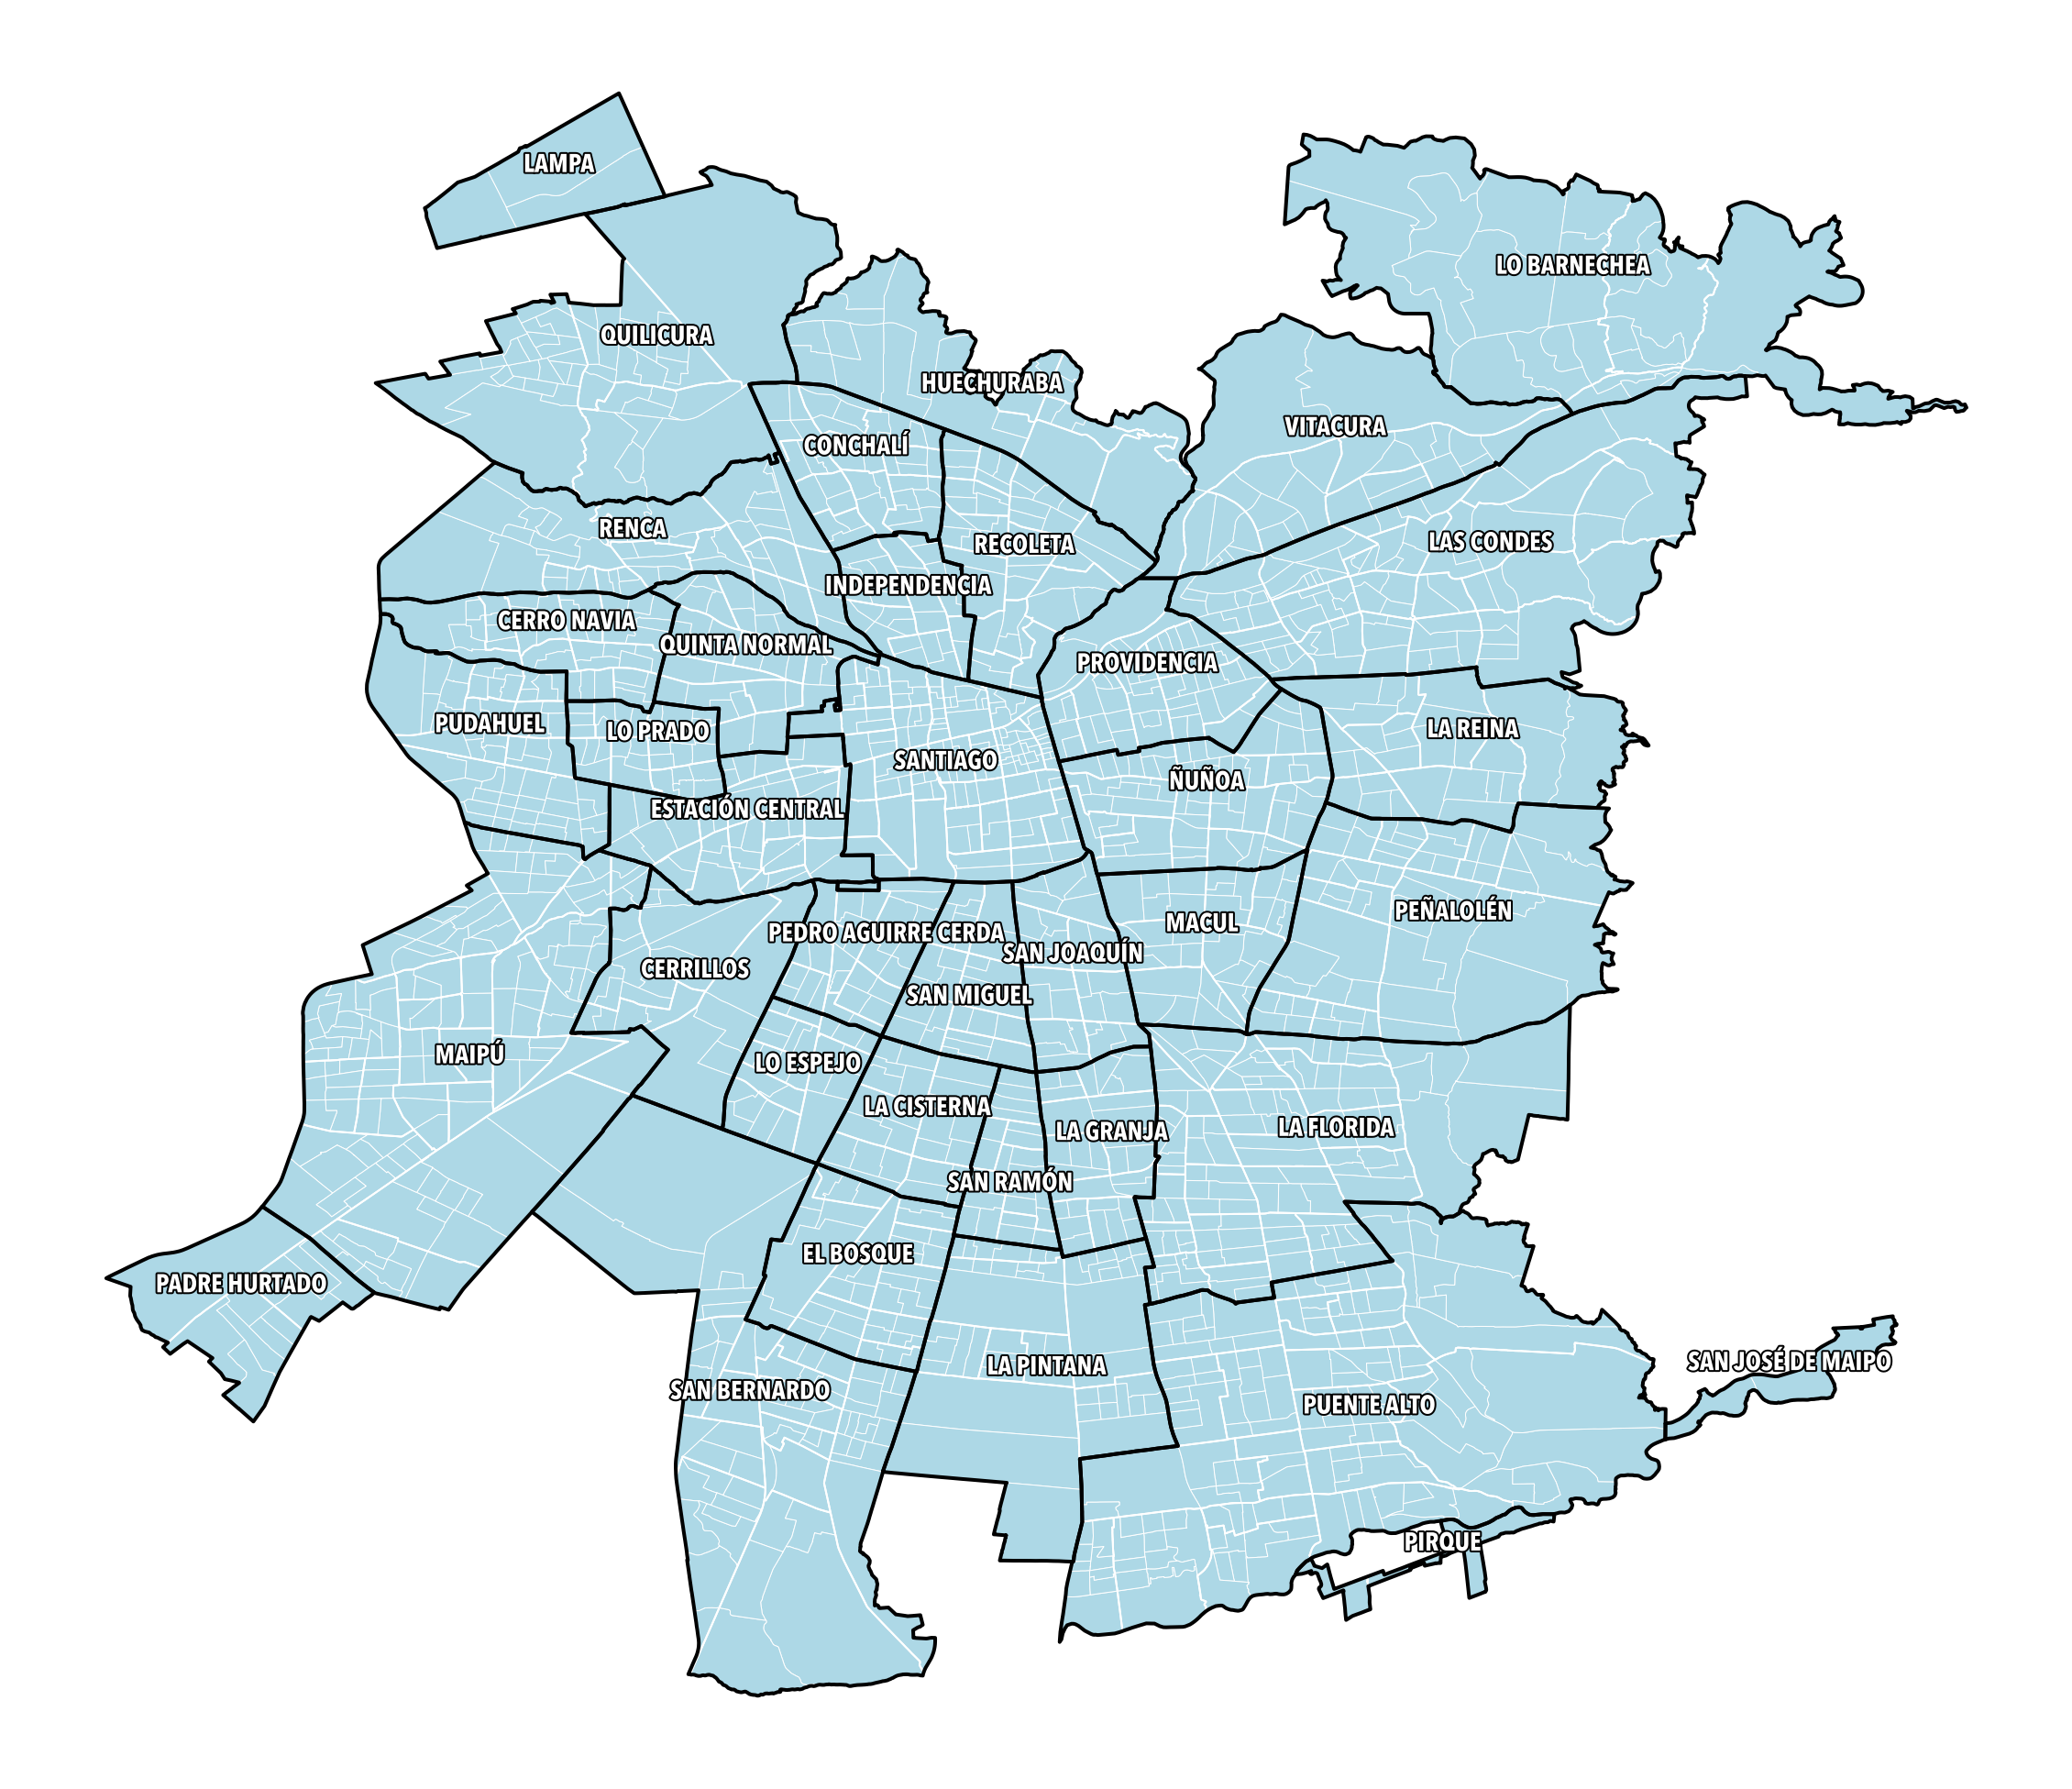

In [21]:
ax = urban_zonas.plot(figsize=(20,20), linewidth=0.5, edgecolor='white', facecolor='lightblue')
ax = urban_distritos.plot(linewidth=1, edgecolor='white', facecolor='none', ax=ax)
ax = urban_comunas.plot(linewidth=2, edgecolor='black', facecolor="none", ax=ax)

texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off')
plt.savefig('images/urban_stgo.png', dpi=150, bbox_inches='tight');

Ahora guardamos los datos en formato ESRI y GeoJson. ¡Espero que les sirva!


Aprovecharemos de renombrar y cambiar a número las columnas que se utilizan en el archivo de microdatos del Censo.

In [24]:
cols_int = {'REGION':np.int,'PROVINCIA':np.int, 'COMUNA':np.int}
urban_comunas = urban_comunas.astype(cols_int)
urban_distritos = urban_distritos.astype(cols_int).rename(columns={'DISTRITO':'DC'})
urban_zonas = urban_zonas.astype(cols_int).rename(columns={'DISTRITO':'DC', 'LOC_ZON':'ZC_LOC'})

In [25]:
urban_stgo.to_file('./output/urban_stgo.shp', driver='ESRI Shapefile')
urban_zonas.to_file('./output/urban_zonas.shp', driver='ESRI Shapefile')
urban_distritos.to_file('./output/urban_distritos.shp', driver='ESRI Shapefile')
urban_comunas.to_file('./output/urban_comunas.shp', driver='ESRI Shapefile')

urban_stgo.to_file('./output/urban_stgo.json', driver='GeoJSON')
urban_zonas.to_file('./output/urban_zonas.json', driver='GeoJSON')
urban_distritos.to_file('./output/urban_distritos.json', driver='GeoJSON')
urban_comunas.to_file('./output/urban_comunas.json', driver='GeoJSON')

# Referencias:
- Departamento de Geografía, Instituto Nacional de Estadísticas. 2018. [Alcances y Consideraciones para el usuario del Censo 2017 Chile](http://www.censo2017.cl/servicio-de-mapas/descargas/mapas/alcances-base-cartografica-censo2017.pdf).  Santiago, Chile. Recuperado desde http://www.censo2017.cl/servicio-de-mapas/descargas/mapas/alcances-base-cartografica-censo2017.pdf.
- Instituto Nacional de Estadísticas. 2018. [Cartografía Censo 2018](http://www.censo2017.cl/servicio-de-mapas/). Santiago, Chile. Recuperado desde http://www.censo2017.cl/servicio-de-mapas/.